<a href="https://colab.research.google.com/github/ccjimenezm/machine_learning2024/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1
### Jesús Daniel Caballero Colina
### Farid Alexis Estepa
### Cristian Jimenez

## Enunciado punto 1
<ol type="a" start="1">
  <li>Download the Abalone dataset. The dataset has one categorical attribute sex, and 8 numerical attributes. Original goal is to predict the rings attribute, which is a regression problem. For this assignment we will do two changes:
  <ol type="i">
  <li>We will ignore the sex attribute.</li>
  <li>We will convert the rings attribute in a binary class label ringClass, such that ringClass = 1 if rings ≥ rings and ringClass = 0 otherwise, where rings is the average value of rings for the whole dataset.</li>
  </ol></li>
</ol>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# fetch dataset
abalone = fetch_ucirepo(id=1)

# FIST CHANGE
# Ignore sex column
abalone.data.features = abalone.data.features.drop('Sex', axis=1)

# SECOND CHANGE
# Calculate the average value of 'rings'
average_rings = abalone.data.targets.mean()
# Create a new column 'ringClass'
abalone.data.targets.insert(loc=0, column='ringClass', value=(abalone.data.targets >= average_rings).astype(int))
abalone.data.targets = abalone.data.targets.drop('Rings', axis=1)

<ol type="a" start="2">
  <li>Load and process the the dataset to obtain two numpy arrays X and y, with the input features and the class label respectively.</li>
</ol>

In [ ]:
# data (as pandas dataframes)
X = abalone.data.features.to_numpy()
y = abalone.data.targets.to_numpy()

print(X)
print(y)

[[0.455  0.365  0.095  ... 0.2245 0.101  0.15  ]
 [0.35   0.265  0.09   ... 0.0995 0.0485 0.07  ]
 [0.53   0.42   0.135  ... 0.2565 0.1415 0.21  ]
 ...
 [0.6    0.475  0.205  ... 0.5255 0.2875 0.308 ]
 [0.625  0.485  0.15   ... 0.531  0.261  0.296 ]
 [0.71   0.555  0.195  ... 0.9455 0.3765 0.495 ]]
[[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


<ol type="a" start="3">
  <li>Split the dataset in training and validation using the following scikit-learn command: train_test_split(X, y, test_size=0.33, random_state=42 where X and y are the input features and labels respectively.</li>
</ol>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<ol type="a" start="4">
  <li>For each one of the 7 input features build a univariate Gaussian classifier estimating the parameters using the training dataset and evaluating the classifier in the validation dataset. For each classifier write down the parameters. Report accuracy, precision and recall. Which classifier is the best? For this classifier draw the curves for the posterior distribution for each class and show where the decision boundary is.</li>
</ol>

In [ ]:
# Initialize a dictionary to hold the Gaussian classifiers for each feature
gaussian_classifiers = []
accuracy_scores = []
precision_scores = []
recall_scores = []

# For each feature in the training set
for i in range(len(abalone.data.features.columns)):
  # Estimate the parameters (mean and standard deviation) of the Gaussian distribution
  mean = X_train[:,i].mean()
  std = X_train[:,i].std()
  # Build the univariate Gaussian classifier
  gaussian_classifier = norm(loc=mean, scale=std)
  gaussian_classifiers.append(gaussian_classifier)

  # Now, we can use these classifiers to make predictions on the validation set
  # For each feature in the validation set
  # Use the classifier to make predictions on the validation set
  probabilities = gaussian_classifier.pdf(X_test[:,i])
  # Here, `predictions` is a numpy array containing the predicted probabilities for each instance in the validation set
  # You can then use these probabilities to make class predictions, evaluate the classifier, etc.
  predictions = (probabilities >= 0.5).astype(int)
  # Calculate accuracy, precision, and recall
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)

  accuracy_scores.append(accuracy)
  precision_scores.append(precision)
  recall_scores.append(recall)
  # Report the metrics
  print(f"Feature: {abalone.data.features.columns[i]}, Mean: {gaussian_classifier.mean()}, Standard Deviation: {gaussian_classifier.std()}")
  print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")
  print("")

Feature: Length, Mean: 0.5260436025732665, Standard Deviation: 0.11966962605333417
Accuracy: 0.536620739666425, Precision: 0.5115562403697997, Recall: 0.992526158445441

Feature: Diameter, Mean: 0.4095085775553967, Standard Deviation: 0.09899151827938374
Accuracy: 0.5293691080493111, Precision: 0.5076103500761036, Recall: 0.9970104633781763

Feature: Height, Mean: 0.14010543245175128, Standard Deviation: 0.04271099873507253
Accuracy: 0.4902102973168963, Precision: 0.48757309941520466, Recall: 0.9970104633781763

Feature: Whole_weight, Mean: 0.8361988920657614, Standard Deviation: 0.49308710885038004
Accuracy: 0.5286439448875997, Precision: 0.5105672969966629, Recall: 0.6860986547085202

Feature: Shucked_weight, Mean: 0.3629833809864189, Standard Deviation: 0.2241500784651146
Accuracy: 0.4474256707759246, Precision: 0.46442234123947973, Recall: 0.9073243647234679

Feature: Viscera_weight, Mean: 0.18220854181558255, Standard Deviation: 0.1094054789100124
Accuracy: 0.45467730239303844, Pr

In [ ]:
# Find the feature with the highest accuracy
index_max = np.argmax(accuracy_scores)
print(f"Feature with highest accuracy: {abalone.data.features.columns[index_max]}, Accuracy: {accuracy_scores[index_max]}")
# Find the feature with the highest precision
index_max = np.argmax(precision_scores)
print(f"Feature with highest precision: {abalone.data.features.columns[index_max]}, Precision: {precision_scores[index_max]}")
# Find the feature with the highest recall
index_max = np.argmax(recall_scores)
print(f"Feature with highest recall: {abalone.data.features.columns[index_max]}, Recall: {recall_scores[index_max]}")

Feature with highest accuracy: Length, Accuracy: 0.536620739666425
Feature with highest precision: Length, Precision: 0.5115562403697997
Feature with highest recall: Diameter, Recall: 0.9970104633781763


We selected the _length_ feature because it has the best accuracy and precision, and it also has a high recall.

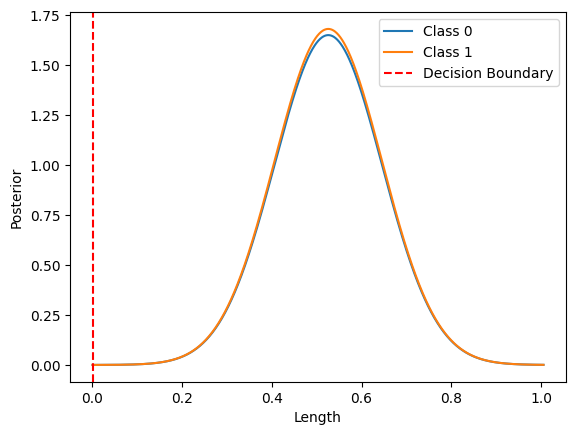

In [ ]:
# Get the Gaussian classifier for the 'length' feature
index = 0
feature = abalone.data.features.columns[index]

gaussian_classifier = gaussian_classifiers[index]
# Calculate the pdfs for the two classes
x_values = np.linspace(X_train[:,i].min(), X_train[:,i].max(), 1000)
pdf_class_0 = gaussian_classifier.pdf(x_values) * (y_train == 0).mean()
pdf_class_1 = gaussian_classifier.pdf(x_values) * (y_train == 1).mean()
# Find the decision boundary (where the two pdfs cross)
decision_boundary = x_values[np.abs(pdf_class_0 - pdf_class_1).argmin()]
# Plot the pdfs
plt.plot(x_values, pdf_class_0, label='Class 0')
plt.plot(x_values, pdf_class_1, label='Class 1')
# Plot the decision boundary
plt.axvline(decision_boundary, color='red', linestyle='--', label='Decision Boundary')
# Add labels and legend
plt.xlabel(feature)
plt.ylabel('Posterior')
plt.legend()
# Show the plot
plt.show()

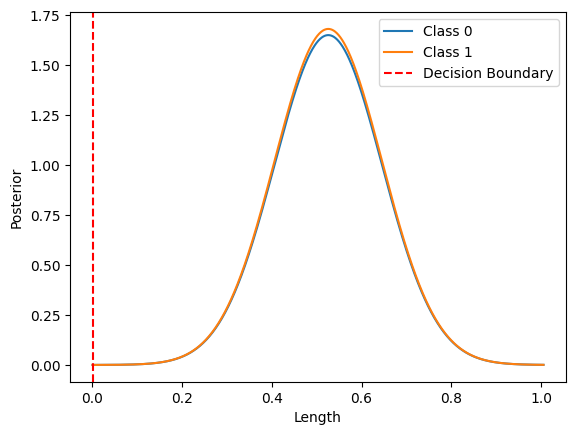

In [ ]:
# Find the decision boundary (where the two pdfs cross)
decision_boundary = x_values[np.where(pdf_class_0 < pdf_class_1)[0][0]]
# Plot the pdfs
plt.plot(x_values, pdf_class_0, label='Class 0')
plt.plot(x_values, pdf_class_1, label='Class 1')
# Plot the decision boundary
plt.axvline(decision_boundary, color='red', linestyle='--', label='Decision Boundary')
# Add labels and legend
plt.xlabel('Length')
plt.ylabel('Posterior')
plt.legend()
# Show the plot
plt.show()

## Enunciado punto 2

<ol type="a" start="1">
  <li>In this question, you will take all the combinations of pair of features. For each pair of features you will model the classes as bivariate Gaussian distributions with a covariance matrix Σ = Iσ, where σ is a scalar, shared by all the classes. This is, the distribution for each class has a different mean but the same covariance matrix.</li>
</ol>

In [ ]:
from scipy.stats import multivariate_normal
from itertools import combinations
# Get all combinations of pair of features
feature_pairs = combinations(range(len(abalone.data.features.columns)), 2)
# Initialize a dictionary to hold the Gaussian classifiers for each pair of features
gaussian_classifiers = {}
# Calculate the standard deviation for the covariance matrix
sigma = X_train.std().mean()
# For each pair of features in the training set
for pair in feature_pairs:
  # Initialize a dictionary to hold the Gaussian classifiers for each class
  gaussian_classifiers[pair] = {}
  # For each class
  for class_label in np.unique(y_train):
    # Get the instances of the current class
    instances = X_train[y_train.reshape(-1,1) == class_label]
    # Estimate the parameters (mean) of the Gaussian distribution for each feature
    mean = instances[list(pair)].mean()
    sigma1 = X_train[pair[0]].std().mean()
    sigma2 = X_train[pair[1]].std().mean()
    cov = cov(X_train[pair[0],pair[1]])
    sum_ = np.array([[sigma1,cov],[cov,sigma2]])
    sum_ = sigma**2 * np.eye(2)
    # Build the bivariate Gaussian classifier with the same covariance matrix for all classes
    gaussian_classifiers[pair][class_label] = multivariate_normal(mean=mean, cov=sum_)

# Now, we can use these classifiers to make predictions on the validation set
# For each pair of features in the validation set
for pair in feature_pairs:
  # For each class
  for class_label in y_train.unique():
    # Get the Gaussian classifier for this pair of features and class
    gaussian_classifier = gaussian_classifiers[pair][class_label]
    # Use the classifier to make predictions on the validation set
    probabilities = gaussian_classifier.pdf(X_test[list(pair)])
    # Here, `probabilities` is a numpy array containing the predicted probabilities for each instance in the validation s
    # You can then use these probabilities to make class predictions, evaluate the classifier, etc.

IndexError: boolean index did not match indexed array along dimension 1; dimension is 7 but corresponding boolean dimension is 1

<ol type="a" start="2">
  <li>For each combination estimate the parameters using the training dataset and evaluate the classifier in the validation dataset. Which combination of parameters obtained the best performance? Report the evaluation results for the best performing combination.</li>
</ol>

<ol type="a" start="3">
  <li>Draw ROC curves for the best performing univariate model (from question 1) and bivariate model. Which model is better? Explain the results.</li>
</ol>

## Enunciado punto 3
<ol type="a" start="1">
  <li>For the best bivariate model (from question 2) draw a plot, where the regions corresponding to the two classes are shown with different colors. A region corresponding to a class is the set of points where the particular class discriminant function is maximum (decision regions, [Alp14] Sect. 3.4).</li>
</ol>

<ol type="a" start="2">
  <li>The boundary between class regions must be a line. Calculate the equation of this line clearly explaining the deduction process. Draw the line along with the regions..</li>
</ol>

## Enunciado punto 4
<ol type="a" start="1">
  <li>Using the best combination of parameters found in question 2 build a bivariate classifier, but this time the covariance matrix could be an arbitrary matrix (not diagonal) and different for each class.</li>
</ol>

<ol type="a" start="2">
  <li> Draw the regions corresponding to each class. Compare with the regions obtained in question 3. Discuss.</li>
</ol>

<ol type="a" start="3">
  <li>Add the possibility of rejection to your model. Draw the three regions corresponding to both classes and rejection. Discuss.</li>
</ol>